# Initial Processing & EDA

By: Aditya Mengani, Ognjen Sosa, Sanjay Elangovan, Song Park, Sophia Skowronski

In [1]:
'''Importing basic data analysis packages'''
import numpy as np
import pandas as pd
import csv
import warnings
import os
import time
import math
warnings.filterwarnings('ignore')

'''Plotting packages'''
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)

### Function: memory reduction of dataframe

In [2]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

# Load Data

Use `tar -xvzf 20200908_bulk_export.tar.gz` to unzip Crunchbase export (for Windows)

Check out summary of data from Crunchbase export <a href='https://data.crunchbase.com/docs/daily-csv-export'>here</a>.

In [3]:
###########################
# Pledge 1% Company UUIDs #
###########################
print('='*100)

p1 = pd.read_csv('~/Desktop/w207/Project/Data/p1.csv')
print('PLEDGE 1%/p1 cols: {}\nSHAPE: {}'.format(p1.columns.to_list(), p1.shape))
p1 = reduce_mem_usage(p1)

#################
# Organizations #
#################
print('='*100)

org = pd.read_csv('~/Desktop/w207/Project/Data/organizations.csv')
print('ORGANIZATION/org cols: {}\nSHAPE: {}'.format(org.columns.to_list(), org.shape))
org = reduce_mem_usage(org)

#org_dscrp = pd.read_csv('files/csv/organization_descriptions.csv')
#print('\nORGANIZATION DESCRIPTION/org_dscrp cols: {}\nSHAPE: {}'.format(org_dscrp.columns.to_list(), org_dscrp.shape))
#org_dscrp = reduce_mem_usage(org_dscrp)

##########
# People #
##########
#print('='*100)

#ppl = pd.read_csv('files/csv/people.csv')
#print('PEOPLE/ppl cols: {}\nSHAPE: {}'.format(ppl.columns.to_list(), ppl.shape))
#ppl = reduce_mem_usage(ppl)

#ppl_dscrp = pd.read_csv('files/csv/people_descriptions.csv')
#print('\nPEOPLE DESCRIPTION/ppl_dscrp cols: {}\nSHAPE: {}'.format(ppl_dscrp.columns.to_list(), ppl_dscrp.shape))
#ppl_dscrp = reduce_mem_usage(ppl_dscrp)

#############
# Financial #
#############
print('='*100)

fund_rnds = pd.read_csv('~/Desktop/w207/Project/Data/funding_rounds.csv')
print('FUNDING ROUNDS/fund_rnds cols: {}\nSHAPE: {}'.format(fund_rnds.columns.to_list(), fund_rnds.shape))
fund_rnds = reduce_mem_usage(fund_rnds)

invest = pd.read_csv('~/Desktop/w207/Project/Data/investments.csv')
print('\nINVESTMENTS/invest cols: {}\nSHAPE: {}'.format(invest.columns.to_list(), invest.shape))
invest = reduce_mem_usage(invest)

invest_prtnr = pd.read_csv('~/Desktop/w207/Project/Data/investment_partners.csv')
print('\nPARTNER INVESTMENTS/invest_prtnr cols: {}\nSHAPE: {}'.format(invest_prtnr.columns.to_list(), invest_prtnr.shape))
invest_prtnr = reduce_mem_usage(invest_prtnr)

########
# Jobs #
########
print('='*100)

jobs = pd.read_csv('~/Desktop/w207/Project/Data/jobs.csv')
print('JOBS/jobs cols: {}\nSHAPE: {}'.format(jobs.columns.to_list(), jobs.shape))
jobs = reduce_mem_usage(jobs)
print('='*100)

PLEDGE 1%/p1 cols: ['uuid', 'p1_tag', 'p1_date']
SHAPE: (7822, 3)
Mem. usage decreased to  0.13 Mb (0.0% reduction)
ORGANIZATION/org cols: ['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at', 'updated_at', 'legal_name', 'roles', 'domain', 'homepage_url', 'country_code', 'state_code', 'region', 'city', 'address', 'postal_code', 'status', 'short_description', 'category_list', 'category_groups_list', 'num_funding_rounds', 'total_funding_usd', 'total_funding', 'total_funding_currency_code', 'founded_on', 'last_funding_on', 'closed_on', 'employee_count', 'email', 'phone', 'facebook_url', 'linkedin_url', 'twitter_url', 'logo_url', 'alias1', 'alias2', 'alias3', 'primary_role', 'num_exits']
SHAPE: (1131310, 41)
Mem. usage decreased to 327.99 Mb (7.3% reduction)
FUNDING ROUNDS/fund_rnds cols: ['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at', 'updated_at', 'country_code', 'state_code', 'region', 'city', 'investment_type', 'announced_on', 'raised_amount_usd', 

In [4]:
#########
#Degrees#
#########
degrees = pd.read_csv('~/Desktop/w207/Project/Data/degrees.csv')
print('DEGREES/degrees cols: {}\nSHAPE: {}'.format(degrees.columns.to_list(), degrees.shape))
degrees = reduce_mem_usage(degrees)

DEGREES/degrees cols: ['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at', 'updated_at', 'person_uuid', 'person_name', 'institution_uuid', 'institution_name', 'degree_type', 'subject', 'started_on', 'completed_on', 'is_completed']
SHAPE: (365783, 17)
Mem. usage decreased to 45.00 Mb (0.0% reduction)


In [5]:
# Update dataframe columns
org = org[['uuid', 'name', 'type', 'rank', 'roles', 'country_code', 'region', 'status', 'domain',
           'category_groups_list', 'total_funding_usd', 'founded_on', 'closed_on',
           'employee_count', 'primary_role']]

fund_rnds['lead_investor_count']=fund_rnds['lead_investor_uuids'].str.split(',').apply(lambda x: float(len(x)) if ~np.any(pd.isnull(x)) else 0)
fund_rnds = fund_rnds[['uuid', 'investment_type', 'announced_on', 'raised_amount_usd', 
                       'post_money_valuation_usd', 'investor_count','lead_investor_uuids',
                       'lead_investor_count', 'org_uuid', 'org_name']]

invest = invest[['uuid', 'funding_round_uuid', 'investor_uuid', 'investor_name', 'investor_type', 
                 'is_lead_investor']]

invest_prtnr = invest_prtnr[['uuid', 'funding_round_uuid', 'investor_uuid', 'investor_name', 
                             'partner_uuid', 'partner_name']]

jobs = jobs[['uuid', 'person_uuid', 'person_name', 'org_uuid', 'org_name', 'started_on', 'ended_on', 'is_current', 'title', 'job_type']]

degrees = degrees[['uuid','person_uuid','person_name','institution_uuid','institution_name','degree_type','subject','started_on','completed_on','is_completed']]

In [6]:
# Merge p1 and org dataframes on the organization uuid
df = pd.merge(org.copy(),p1.copy(),how='outer',on='uuid')

# Convert Boolean to binary
df['p1_tag'] = df['p1_tag'].apply(lambda x: 1 if x == True else 0)
p1['p1_tag'] = 1

# Convert employee_count 'unknown' to np.nan to get accurate missing value count
df['employee_count'] = df['employee_count'].apply(lambda x: np.NaN if x == 'unknown' else x)

##############
# Timestamps #
##############

# Convert to datetime objects
df['p1_date'] = pd.to_datetime(df['p1_date'])
p1['p1_date'] = pd.to_datetime(p1['p1_date'])

# Get OutOfBoundsDatetime error if do not coerce for CB native timestamp columns
df['founded_on'] = pd.to_datetime(df['founded_on'], errors='coerce')

# Reduce storage for numerical features
df = reduce_mem_usage(df, verbose=False)

# Create new pledge1 dataframe that sorts by chronological order that the company took the pledge
pledge1 = df[df['p1_tag'] == 1].sort_values('p1_date')

# Explore Degree Data

In [7]:
df2 = pd.merge(df.copy(),degrees.copy(),how='outer',on='uuid')
pledge1_2 = df2[df2['p1_tag'] == 1].sort_values('p1_date')

In [8]:
pledge1_2.head(10)

,uuid,name,type,rank,roles,country_code,region,status,domain,category_groups_list,...,p1_date,person_uuid,person_name,institution_uuid,institution_name,degree_type,subject,started_on,completed_on,is_completed
545408,1c159cb4-f51b-4675-9f64-fdc4275b880f,Doc Popcorn,organization,264198.0,company,USA,Kentucky,operating,docpopcorn.com,"Commerce and Shopping,Food and Beverage",...,2014-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207433,3718597a-dd39-6661-3630-09cdd43bcac2,Techstars,organization,3757.0,"investor,company",USA,Colorado,operating,techstars.com,"Financial Services,Lending and Investments",...,2014-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38892,f94e233b-276d-f0c7-24cf-d57838941a99,Aztek Networks,organization,86167.0,company,USA,Colorado,acquired,azteknetworks.net,"Hardware,Internet Services",...,2014-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397273,cd53b213-53dc-0b82-be18-24deab2b8634,Sovrn,organization,4610.0,company,USA,Colorado,acquired,sovrn.com,"Advertising,Content and Publishing,Data and An...",...,2014-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91226,81e4f87c-1892-f8c3-112b-5ff7f78b5c74,9-1-1 Labs,organization,338800.0,company,USA,Colorado,operating,9-1-1labs.com,"Commerce and Shopping,Information Technology,S...",...,2014-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1828,b4f68926-2695-1a68-f894-714b290febd0,Foundry Group,organization,37153.0,investor,USA,Colorado,operating,foundrygroup.com,"Consumer Electronics,Financial Services,Hardwa...",...,2014-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107346,6d8646b4-1c69-2f77-3bef-d9dc00a3cb5c,Brandfolder,organization,2492.0,company,USA,Colorado,acquired,brandfolder.com,"Media and Entertainment,Sales and Marketing,So...",...,2014-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86369,69bd57bd-6745-ce00-9529-c9c270e22de1,Ascend ERP Cloud,organization,262811.0,company,USA,Colorado,operating,ascenderpcloud.com,"Information Technology,Internet Services,Software",...,2014-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100846,8e3fe368-f2d7-0f11-d0f6-9872e5276156,GoodApril,organization,74562.0,company,USA,California,acquired,goodapril.com,"Financial Services,Software",...,2014-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5184,d95d476d-8785-06c9-abd5-88534ba60c82,Rally Software,organization,8153.0,company,USA,Colorado,acquired,ca.com,"Education,Software",...,2014-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Exclude rows that have NaN institution_uuid
pledge1_2_degrees = pledge1_2[~pledge1_2['institution_name'].isna()]
df2_degrees = df2[~df2['institution_name'].isna()]

# Create count column to sum over
df2_degrees['count'] = 1

# Groupby 
pledge1_2_degrees = pledge1_2_degrees.groupby(['institution_name'])['p1_tag'].sum().sort_values(ascending=False).reset_index()
df2_degrees = df2_degrees.groupby(['institution_name'])['count'].sum().sort_values(ascending=False).reset_index()

In [10]:
df2_degrees.head(10)

,institution_name,count
0,Stanford University,7473
1,Harvard Business School,5224
2,"University of California, Berkeley",4892
3,Massachusetts Institute of Technology - MIT,4601
4,Harvard University,4344
5,Wharton School of the University of Pennsylvania,3331
6,Cornell University,3063
7,University of Pennsylvania,2868
8,The University of Texas at Austin,2708
9,Columbia University,2648


In [11]:
pledge1_2_degrees.head(10)

,institution_name,p1_tag


Can't create plots with degree data because degree data is missing for all P1 companies...:(

KeyboardInterrupt: 

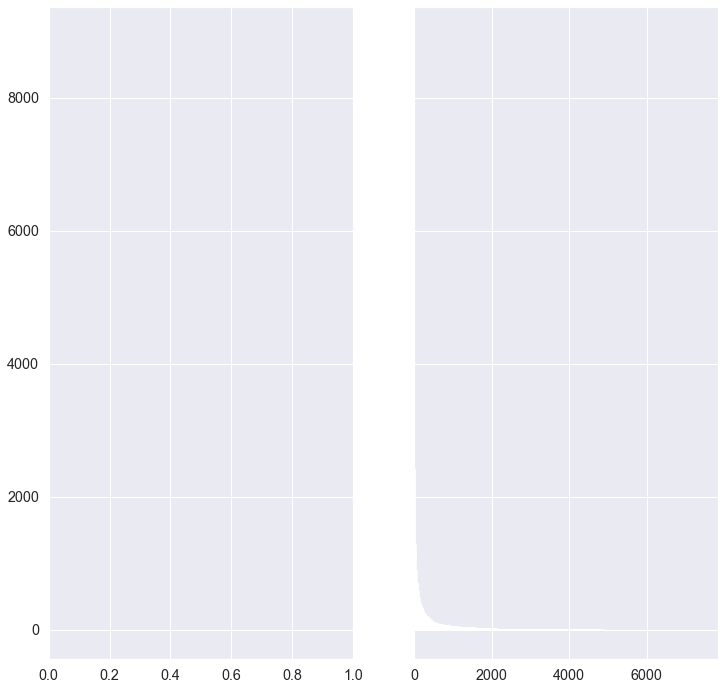

In [12]:
# Barplots
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 12), sharey=True)
#sns.barplot(x='p1_tag', y='institution_name', data=pledge1_2_degrees, orient='h', ax=ax[0])
sns.barplot(x='count', y='institution_name', data=df2_degrees, orient='h', ax=ax[1])

# Labels
ax[0].set_title('Pledge Companies by Employee Count\n')
ax[0].xaxis.set_ticks_position('top')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Employee Count')
ax[1].set_title('Crunchbase Companies by Employee Count\n')
ax[1].xaxis.set_ticks_position('top')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('')

# Plot
plt.show()

del df2_degrees, pledge1_2_degrees